# Numerična matematika - domača naloga 2
Gregor Kovač

In [1]:
# Uvozimo vse potrebne knjižnice
import numpy as np
from scipy.stats import norm # Normalno porazdelitev iz scipy.stats uporabljamo izkljucno za primerjavo z naso implementacijo
import matplotlib.pyplot as plt

from normal import std_normal_integral, std_normal
from hipotrohoida import *

# Nastavitve za LaTex nacin izrisovanja
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# 1. Naloga s funkcijo
## Porazdelitvena funkcija normalne slučajne spremenljivke 

Numerično moramo izračunati vrednost integrala standardne normalne porazdelitve $X \sim N(0,1)$, ki je podan s formulo: \
$\Phi(x) = P(X \le x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-\frac{t^2}{2}}$. \
Ta funkcija je gostota verjentosti zat vemo, da bo integral po celi realni osi enak 1. Prav tako vemo, da je standardna normalna porazdelitev simetrična s srednjo vrednostjo 0, zato bo integral na intervalu $[-\infty, 0]$ enak $1/2$. Tako se lahko izognemo računanju neskončnega integrala:
$\Phi(x) = P(X \le x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-\frac{t^2}{2}} = \begin{cases} \frac{1}{\sqrt{2\pi}} (\int_{-\infty}^{0} e^{-\frac{t^2}{2}} + \int_{0}^{x} e^{-\frac{t^2}{2}}) \quad x > 0 \\ \frac{1}{\sqrt{2\pi}} (\int_{-\infty}^{0} e^{-\frac{t^2}{2}} - \int_{x}^{0} e^{-\frac{t^2}{2}}) \quad x \le 0 \\ \end{cases} = \begin{cases} \frac{1}{2} + \frac{1}{\sqrt{2\pi}} \int_{0}^{x} e^{-\frac{t^2}{2}} \quad x > 0 \\  \frac{1}{2} - \frac{1}{\sqrt{2\pi}} \int_{x}^{0} e^{-\frac{t^2}{2}} \quad x \le 0 \\ \end{cases}$.
Preostali integral izračunamo z Gaussovimi kvadraturnimi formulami tako, da ga prestavimo na interval $[-1, 1]$ in nato uporabimo tabelo vrednosti Gauss-Legendrovih kvadratur za $n = 8$ (vir: [Gaussian Quadrature Weights and Abscissae, Mike Kamermans, 2011](https://pomax.github.io/bezierinfo/legendre-gauss.html)).


Izračunajmo nekaj vrednosti.

In [2]:
for x in [0, 1, 2, 3, -1, -2, -3, np.inf, -np.inf]:
    print(f"Phi({x}) = {round(std_normal_integral(x, n = 8), 10)}")

Phi(0) = 0.5
Phi(1) = 0.8413447461
Phi(2) = 0.9772498681
Phi(3) = 0.9986501014
Phi(-1) = 0.1586552539
Phi(-2) = 0.0227501319
Phi(-3) = 0.0013498986
Phi(inf) = 1
Phi(-inf) = 0


Našo implementacijo lahko primerjamo z implementacijo v knjižnici `scipy`, da preverimo pravilnost.

In [3]:
for x in [0, -1, 1, 2, -2, np.inf, -np.inf]:
    phi = round(std_normal_integral(x, n=8), 10)
    phi_scipy = norm.cdf(x).round(10)
    if phi == phi_scipy:
        print(f"Phi({x}) = Phi_scipy({x}) = {phi}")
    else:
        print(f"Phi({x}) = {phi} != Phi_scipy({x}) = {phi_scipy}")

Phi(0) = Phi_scipy(0) = 0.5
Phi(-1) = Phi_scipy(-1) = 0.1586552539
Phi(1) = Phi_scipy(1) = 0.8413447461
Phi(2) = Phi_scipy(2) = 0.9772498681
Phi(-2) = Phi_scipy(-2) = 0.0227501319
Phi(inf) = Phi_scipy(inf) = 1
Phi(-inf) = Phi_scipy(-inf) = 0


$\Phi(x)$ lahko tudi grafično predstavimo. Izračunamo vrednosti za $x \in [-3, 3]$ in jih izrišemo.

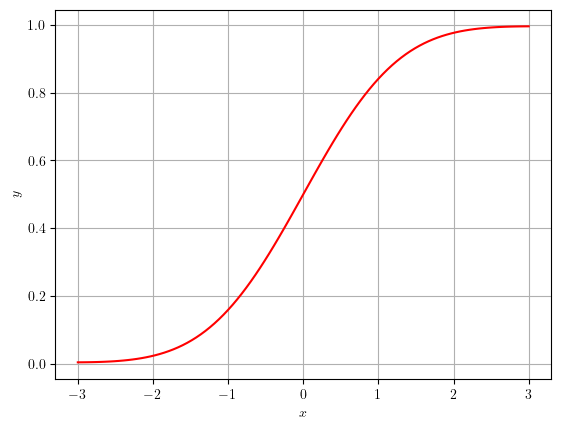

In [4]:
x = np.linspace(-3, 3, 100)
y = [std_normal_integral(i, n = 3) for i in x]
plt.plot(x, y, color = "red")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.grid()
plt.show()

Dobili smo ravno graf gostoto standardne normalne porazdelitve.

## 2. Naloga s števili
### Ploščina hipotrohoide

Izračunati moramo ploščino hipotrhoide, podane parametrično z: \
$x(t) = (a + b)\cos(t) + b\cos(\frac{a+b}{b}t)$ \
$y(t) = (a + b)\sin(t) + b\sin(\frac{a+b}{b}t)$, \
kjer sta $a = 1$ in $b = - \frac{11}{7}$. 

Najprej to krivuljo narišemo, da si lažje predstavljamo problem.

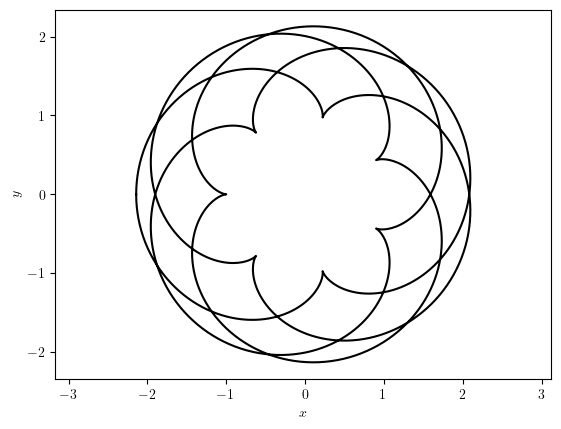

In [3]:
p = np.linspace(0, 14 * 11 * np.pi / 7, 1000)
hip = h(p)

plt.plot(hip[0], hip[1], color = 'black')
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

**Opomba:** *periodo hipotrohoide smo pridobili iz dolžine enega zunanjega loka, ki ga bomo omenili kasneje.*

Dobili smo namig, naj uporabimo formulo za ploščino krivočrtnega trikotnika pod krivuljo, ki je podana z enačbo: \
$P = \frac{1}{2} \int_{t_1}^{t_2} (x(t)\dot{y}(t) - \dot{x}(t)y(t)) dt$. \
Ta integral lahko aproksimiramo s trapeznim pravilom.

Implementacijo preizkusimo na krogu.

In [4]:
p = np.linspace(0, 2 * np.pi, 100)

x = lambda t: np.cos(t)
y = lambda t: np.sin(t)
dx = lambda t: -np.sin(t)
dy = lambda t: np.cos(t)

P = trikotnik(x, y, dx, dy, 0, 2 * np.pi, n = 1000)

if P == np.pi:
    print("Površina, izračunana s trikotniki, je enaka površini kroga.")
    print(f"{P:.10f} == {np.pi:.10f}")
else:
    print("Površina, izračunana s trikotniki, ni enaka površini kroga.")
    print(f"{P:.10f} != {np.pi:.10f}")

Površina, izračunana s trikotniki, je enaka površini kroga.
3.1415926536 == 3.1415926536


Računanje ploščine hipotrohoide na naiven način ne deluje, ker vsebuje samopresečišča in se zato ploščina določenih območjih upošteva večkrat. To lahko demonstriramo.

In [5]:
trikotnik(hx, hy, dhx, dhy, 0, 14 * 11 * np.pi /7, 1000).round(10)

42.3153296198

Hipotrohoida je omejena na območje $[-2, 2] \times [-2, 2]$, torej je njena ploščina manjša od $4 \cdot 4 = 16$. Vidimo, da je zgornji rezultat res napačen. 

Opazimo, da je zunanji rob krivulje sestavljen iz 7 manjših lokov. Formulo za ploščino trikotnika lahko uporabimo na enem od teh lokov in rezultat množimo s 7, da dobimo ploščino območja, ki ga omejuje hipotrohoida.

Najprej poiščemo sredinske točke teh lokov. Iz grafa krivulje opazimo, da je ena od njih $[-2, 0]$. Za ostale pa lahko iščemo maksimum norme $\sqrt{x(t)^2 + y(t)^2}$. V našem primeru maksimiziramo naslednji poenostavljen izraz: $\cos(t)\cos(\frac{4}{11}t) + \sin(t)\sin(\frac{4}{11}t)$. Rešitev je $t = \frac{11 \cdot n \cdot 2\pi}{7}$, kjer je $n$ celo število. Rešitev tudi demonstriramo.

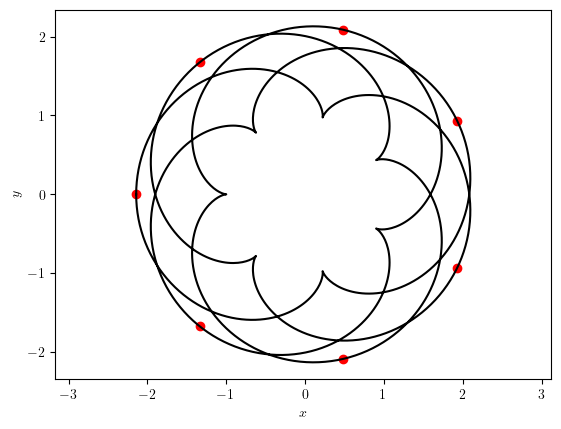

Norma sredinske točke: 2.1428571429


In [6]:
p = np.linspace(0, 14 * 11 * np.pi / 7, 1000)

hip = h(p)
plt.plot(hip[0], hip[1], color = 'black')

hip_norm = 0

for n in range(0, 7):
    t_s = (11 * np.pi * 2 * n) / 7 
    hip = h(t_s)
    hip_norm = np.linalg.norm(hip)
    plt.scatter(hip[0], hip[1], color = 'red')

plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

print(f"Norma sredinske točke: {hip_norm:.10f}")

**Opomba:** *pri zgornjem primeru si zabeležimo tudi evklidsko normo ene od teh skrajnih točk. Uporabili jo bomo kasneje.*

Z eksperimentiranjem ugotovimo, da je dolžina loka $\frac{11}{7}$.

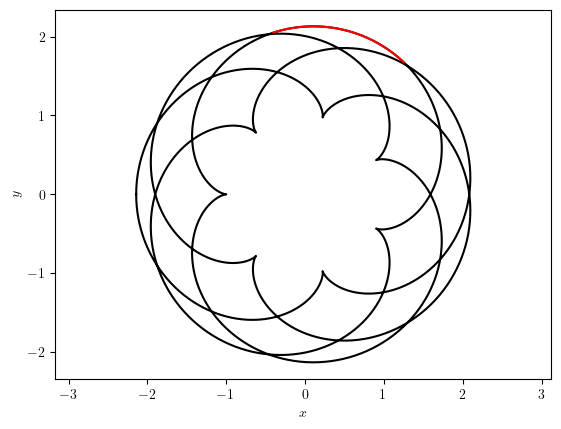

In [4]:
p = np.linspace(0, 14 * 11 * np.pi / 7, 1000)

hip = h(p)
plt.plot(hip[0], hip[1], color = 'black')

n = 6

t_s_l = 11 * np.pi * n / 7 - 11/(7 * 2)
t_s_r = 11 * np.pi * n / 7 + 11/(7 * 2) 

t_s = np.linspace(t_s_l, t_s_r, 1000)

hip = h(t_s)
plt.plot(hip[0], hip[1], color = 'red')

plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

Končno lahko izračunamo ploščine hipotrohoide.

In [5]:
hipotrohoida(n = 1000).round(10)

13.1922618186

Vidimo, da je ta vrednost manjša od ploščine območja $[-2, 2] \times [-2, 2]$, ki je 16. Za še bolj natančno mejo pa lahko izračunamo tudi ploščino kroga, ki omejuje hipotrohoido in preverimo, da je tudi ta večja.

In [8]:
(np.pi * hip_norm ** 2).round(10)

14.4256805522